# Import Library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import glob
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Import dan Baca Data

In [2]:
data = pd.read_excel("C:/E_Drive/data zinedine/masa kuliah/matkul smt 6/Kerja Praktikum (KP)/3 data angkatan kerja jawa barat 2018-2021.xlsx")

In [3]:
data

,Tahun,Kabupaten,Jumlah,Status
0,2017,Bogor,2351753,Bekerja
1,2017,Sukabumi,1037532,Bekerja
2,2017,Cianjur,846258,Bekerja
3,2017,Bandung,1584391,Bekerja
4,2017,Garut,1044137,Bekerja
...,...,...,...,...
400,2021,Kota Bekasi,840600,Bukan Angkatan Kerja
401,2021,Kota Depok,720646,Bukan Angkatan Kerja
402,2021,Kota Cimahi,180704,Bukan Angkatan Kerja
403,2021,Kota Tasikmalaya,178418,Bukan Angkatan Kerja


In [4]:
#menghitung missing value
data.isnull().sum()

Tahun        0
Kabupaten    0
Jumlah       0
Status       0
dtype: int64

In [5]:
#menghitung jumlah output
data['Status'].value_counts()

Bekerja                 135
Pengangguran            135
Bukan Angkatan Kerja    135
Name: Status, dtype: int64

In [6]:
#mengecek tipe data tiap variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tahun      405 non-null    int64 
 1   Kabupaten  405 non-null    object
 2   Jumlah     405 non-null    int64 
 3   Status     405 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.8+ KB


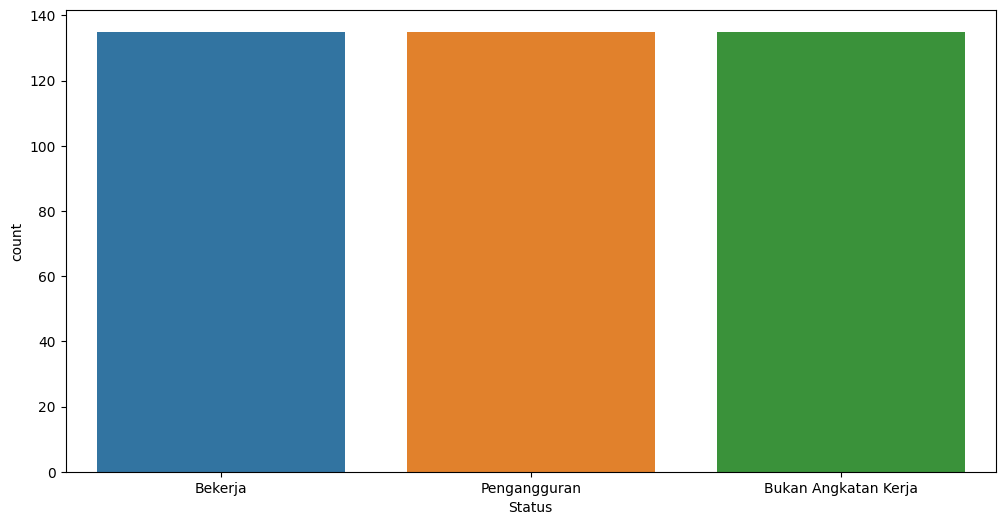

In [7]:
#output Variabel
fig=plt.figure(figsize=(12,6))
sns.countplot(x=data["Status"])
plt.show()

# Data Prepocesing

In [8]:
#melabeli data yang ada di variabel "Tahun", "Kabupaten", dan "Status" menjadi numerik
data[['Tahun', 'Kabupaten', 'Status']] = data[['Tahun', 'Kabupaten', 'Status']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
print(data)

     Tahun  Kabupaten   Jumlah  Status
0        0          3  2351753       0
1        0         24  1037532       0
2        0          5   846258       0
3        0          0  1584391       0
4        0          7  1044137       0
..     ...        ...      ...     ...
400      4         12   840600       1
401      4         16   720646       1
402      4         14   180704       1
403      4         18   178418       1
404      4         11    52920       1

[405 rows x 4 columns]


In [9]:
#Normalisasi data variabel "Jumlah" dengan standalcaler
columns = ['Jumlah']
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data[columns])

In [10]:
data_scale

array([[9.26024692e-01],
       [4.07360867e-01],
       [3.31873636e-01],
       [6.23181479e-01],
       [4.09967563e-01],
       [2.98673288e-01],
       [2.35524550e-01],
       [1.65898339e-01],
       [3.45508570e-01],
       [2.22551847e-01],
       [1.97520857e-01],
       [2.92314213e-01],
       [2.83745465e-01],
       [1.52893275e-01],
       [3.96822002e-01],
       [5.50309232e-01],
       [2.63041472e-01],
       [9.08590415e-02],
       [1.74851481e-01],
       [4.95576115e-02],
       [4.38537425e-01],
       [5.40318147e-02],
       [4.97799996e-01],
       [3.96258829e-01],
       [1.05246582e-01],
       [1.12499946e-01],
       [3.10573714e-02],
       [9.59133874e-02],
       [3.18395775e-02],
       [3.54254124e-02],
       [2.34172462e-02],
       [3.30618239e-02],
       [1.91656284e-02],
       [1.08419608e-02],
       [1.23787472e-02],
       [3.48578986e-02],
       [9.77797107e-03],
       [1.32765872e-02],
       [2.57212418e-02],
       [2.52662046e-02],


In [11]:
#Memasukan variabel "Jumlah" yang telah dinormalisasi data ke data aktual
data["Jumlah"]=data_scale

In [12]:
data

,Tahun,Kabupaten,Jumlah,Status
0,0,3,0.926025,0
1,0,24,0.407361,0
2,0,5,0.331874,0
3,0,0,0.623181,0
4,0,7,0.409968,0
...,...,...,...,...
400,4,12,0.329641,1
401,4,16,0.282300,1
402,4,14,0.069209,1
403,4,18,0.068307,1


In [13]:
#menghilangkan variabel "Tahun"
data=data.drop(columns=['Tahun'], inplace=False,axis=1)

In [14]:
data

,Kabupaten,Jumlah,Status
0,3,0.926025,0
1,24,0.407361,0
2,5,0.331874,0
3,0,0.623181,0
4,7,0.409968,0
...,...,...,...
400,12,0.329641,1
401,16,0.282300,1
402,14,0.069209,1
403,18,0.068307,1


In [15]:
#mengecek tipe data tiap variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kabupaten  405 non-null    int32  
 1   Jumlah     405 non-null    float64
 2   Status     405 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 6.5 KB


# Splitting data

In [16]:
#Splitting the data into independent and dependent variables
X = data.iloc[:,0:2].values
y = data.iloc[:,2].values

# Klasifikasi SVM dengan perbandingan 90:10

In [17]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 250)

In [18]:
X_train.shape

(364, 2)

In [19]:
X_test.shape

(41, 2)

In [20]:
svc = SVC(kernel="poly",C=195)
svc.fit(X_train,y_train)

SVC(C=195, kernel='poly')

In [21]:
y_pred_svm=svc.predict(X_test)

In [22]:
# Check accuracy score 
print('Model accuracy score with 100 SVM : {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

Model accuracy score with 100 SVM : 0.8049


In [23]:
cm = confusion_matrix(y_test, y_pred_svm)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 1  6  2]
 [ 0  9  0]
 [ 0  0 23]]


In [24]:
#evaluasi model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.60      1.00      0.75         9
           2       0.92      1.00      0.96        23

    accuracy                           0.80        41
   macro avg       0.84      0.70      0.64        41
weighted avg       0.87      0.80      0.75        41



In [25]:
y_test

array([0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0])

In [26]:
y_pred_svm

array([1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1])

# Klasifikasi SVM dengan perbandingan 80:20

In [27]:
# Creating the Training and Test set from data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 250)

In [28]:
X_train1.shape

(324, 2)

In [29]:
X_test1.shape

(81, 2)

In [30]:
svc1 = SVC(kernel="poly",C=195)
svc1.fit(X_train,y_train)

SVC(C=195, kernel='poly')

In [31]:
y_pred_svm1=svc1.predict(X_test1)

In [32]:
# Check accuracy score 
print('Model accuracy score with 100 SVM 1 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_svm1)))

Model accuracy score with 100 SVM 1 : 0.6914


In [33]:
cm1 = confusion_matrix(y_test1, y_pred_svm1)

print('Confusion matrix\n\n', cm1)

Confusion matrix

 [[ 2 11  7]
 [ 1 17  6]
 [ 0  0 37]]


In [34]:
#evaluasi model
print(classification_report(y_test1, y_pred_svm1))

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.61      0.71      0.65        24
           2       0.74      1.00      0.85        37

    accuracy                           0.69        81
   macro avg       0.67      0.60      0.56        81
weighted avg       0.68      0.69      0.63        81



In [35]:
y_test1

array([0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2])

In [36]:
y_pred_svm1

array([1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2])

# Klasifikasi SVM dengan perbandingan 70:30

In [37]:
# Creating the Training and Test set from data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.30, random_state = 250)

In [38]:
X_train2.shape

(283, 2)

In [39]:
X_test2.shape

(122, 2)

In [40]:
svc2 = SVC(kernel="poly",C=195)
svc2.fit(X_train,y_train)

SVC(C=195, kernel='poly')

In [41]:
y_pred_svm2=svc2.predict(X_test2)

In [42]:
# Check accuracy score 
print('Model accuracy score with 100 SVM 2 : {0:0.4f}'. format(accuracy_score(y_test2, y_pred_svm2)))

Model accuracy score with 100 SVM 2 : 0.6475


In [43]:
cm2 = confusion_matrix(y_test2, y_pred_svm2)

print('Confusion matrix\n\n', cm2)

Confusion matrix

 [[ 6 19  8]
 [ 4 23 11]
 [ 0  1 50]]


In [44]:
#evaluasi model
print(classification_report(y_test2, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.60      0.18      0.28        33
           1       0.53      0.61      0.57        38
           2       0.72      0.98      0.83        51

    accuracy                           0.65       122
   macro avg       0.62      0.59      0.56       122
weighted avg       0.63      0.65      0.60       122

